In [ ]:
!pip install pandas-datareader


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader as pdr

In [ ]:
df=pd.read_csv(r"/content/drive/MyDrive/APPL_STOCK.csv")

In [ ]:
df.tail(5)

,Date,High,Low,Open,Close,Volume,Adj Close
2512,2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,70.027306
2513,2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.416672
2514,2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.389580
2515,2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,71.813286
2516,2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,72.337982


In [ ]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.452590
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.553025
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.564355
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.459941
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.447998


In [ ]:
df.shape

(2517, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2517 non-null   object 
 1   High       2517 non-null   float64
 2   Low        2517 non-null   float64
 3   Open       2517 non-null   float64
 4   Close      2517 non-null   float64
 5   Volume     2517 non-null   float64
 6   Adj Close  2517 non-null   float64
dtypes: float64(6), object(1)
memory usage: 137.8+ KB


Data Visualization

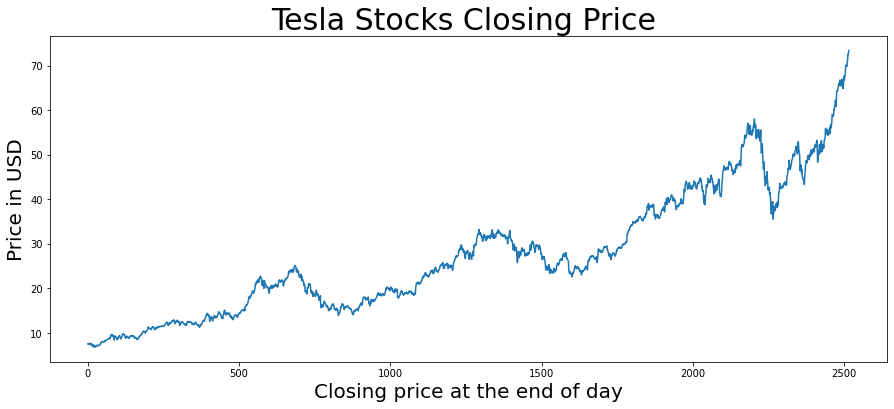

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(df['Close'])
plt.title("Tesla Stocks Closing Price ",fontsize=30)
plt.xlabel("Closing price at the end of day",fontsize=20)

plt.ylabel("Price in USD",fontsize=20)
plt.show()


Text(0.5, 0, 'Day from 29-06-2010 to 03-02-2020')

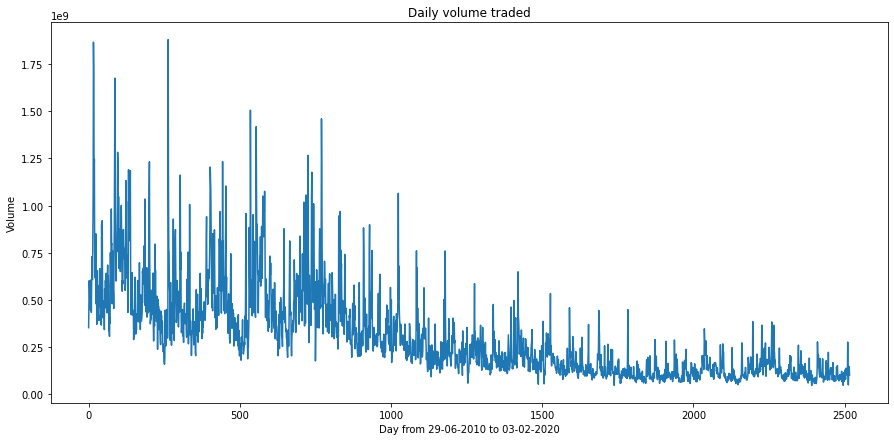

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(df['Volume'])
plt.title('Daily volume traded')
plt.ylabel('Volume')
plt.xlabel('Day from 29-06-2010 to 03-02-2020')

In [ ]:
df=df.reset_index()
df.head()

,index,Date,High,Low,Open,Close,Volume,Adj Close
0,0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.452590
1,1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.553025
2,2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.564355
3,3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.459941
4,4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.447998


In [ ]:
df=df.drop(columns=['Date','Adj Close'],axis=1)
df.head()

,index,High,Low,Open,Close,Volume
0,0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,4,7.571429,7.466071,7.562500,7.520714,477131200.0


Plotting moving averages for 100 and 50 days






In [ ]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    54.261513
2513    54.396763
2514    54.529350
2515    54.661100
2516    54.793137
Name: Close, Length: 2517, dtype: float64

Moving average plot for 200 days

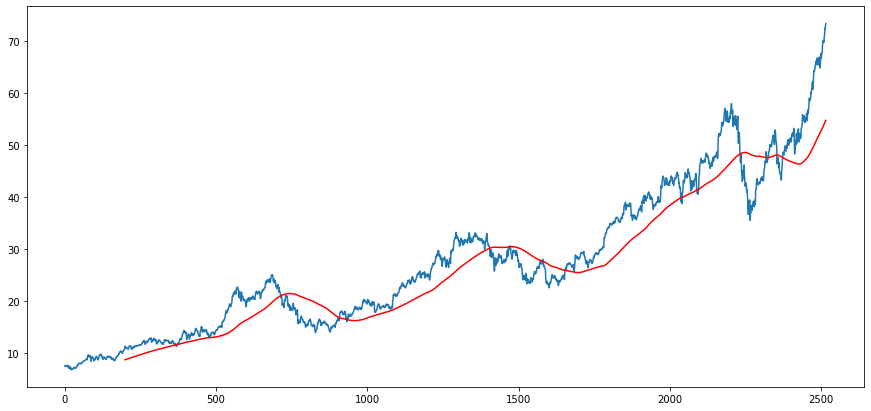

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(df.Close)
plt.plot(ma200,'r')

In [ ]:
ma50=df.Close.rolling(50).mean()
ma50

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2512    65.16060
2513    65.43355
2514    65.71070
2515    65.99190
2516    66.27810
Name: Close, Length: 2517, dtype: float64

MOving average plot for 50 days

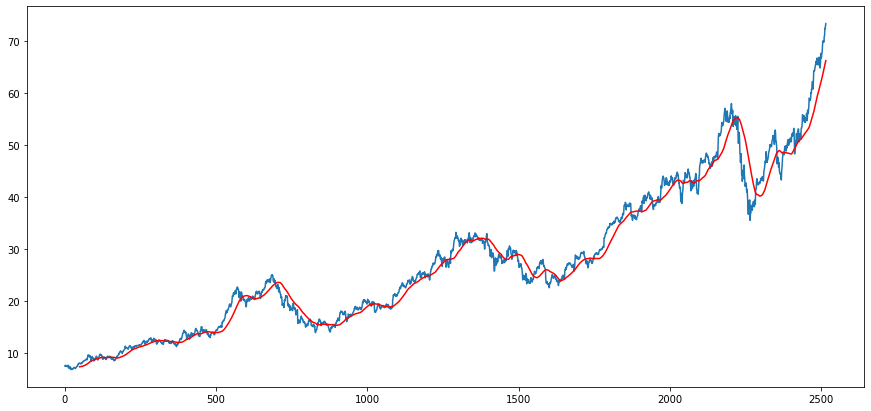

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(df.Close)
plt.plot(ma50,'r')

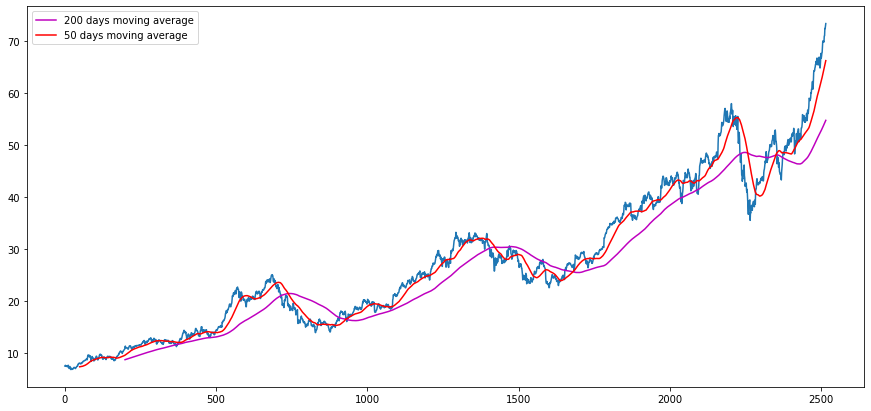

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(df.Close)
plt.plot(ma200,'m',label="200 days moving average")
plt.plot(ma50,'r',label="50 days moving average")
plt.legend()
plt.show()

Splitting data for testing and traning

In [ ]:
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing)

(1761, 1)
          Close
1761  29.182501
1762  28.955000
1763  29.037500
1764  29.004999
1765  29.152500
...         ...
2512  71.067497
2513  72.477501
2514  72.449997
2515  72.879997
2516  73.412498

[756 rows x 1 columns]


In [ ]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [ ]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [ ]:
from sklearn.preprocessing import MinMaxScaler
Scalar=MinMaxScaler(feature_range=(0,1))


In [ ]:
data_training_array=Scalar.fit_transform(data_training)
data_training_array

array([[0.02527908],
       [0.02971782],
       [0.03021854],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [ ]:
data_training_array.shape

(1761, 1)

In [ ]:
x_train=[]
y_train=[]
for i in range(100,data_training_array.shape[0]):
  x_train.append(data_training_array[i-100: i])
  y_train.append(data_training_array[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
x_train.shape

(1661, 100, 1)

LSTM Model(long short term memory)

In [ ]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [ ]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True, input_shape =(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences =True ))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences =True ))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu' ))
model.add(Dropout(0.5))

model.add(Dense(units= 1))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 [==============================] - 16s 228ms/step - loss: 0.0689
Epoch 2/50
52/52 [==============================] - 12s 224ms/step - loss: 0.0127
Epoch 3/50
52/52 [==============================] - 12s 226ms/step - loss: 0.0109
Epoch 4/50
52/52 [==============================] - 13s 245ms/step - loss: 0.0112
Epoch 5/50
52/52 [==============================] - 12s 227ms/step - loss: 0.0092
Epoch 6/50
52/52 [==============================] - 12s 224ms/step - loss: 0.0090
Epoch 7/50
52/52 [==============================] - 12s 222ms/step - loss: 0.0086
Epoch 8/50
52/52 [==============================] - 12s 223ms/step - loss: 0.0083
Epoch 9/50
52/52 [==============================] - 12s 223ms/step - loss: 0.0083
Epoch 10/50
52/52 [==============================] - 12s 222ms/step - loss: 0.0076
Epoch 11/50
52/52 [==============================] - 12s 225ms/step - loss: 0.0076
Epoch 12/50
52/52 [==============================] - 12s 223ms/step - loss: 0.0069
Epoch 13/50
5

In [ ]:
# model.load_weights('stock_price_prediction.h5')

In [ ]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [ ]:
data_training.tail(100)

,Close
1661,27.092501
1662,27.202499
1663,27.000000
1664,26.982500
1665,27.045000
...,...
1756,29.264999
1757,29.072500
1758,29.129999
1759,29.315001


In [ ]:
past_100_days=data_training.tail(100)

In [ ]:
final_df=past_100_days.append(data_testing,ignore_index=True)

In [ ]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [ ]:
input_data=Scalar.fit_transform(final_df)
input_data

array([[0.0275037 ],
       [0.02981315],
       [0.02556164],
       [0.02519422],
       [0.02650642],
       [0.03332987],
       [0.03280496],
       [0.03196517],
       [0.03123034],
       [0.0327    ],
       [0.02823853],
       [0.0300231 ],
       [0.02571909],
       [0.02330465],
       [0.01999793],
       [0.01936806],
       [0.01506405],
       [0.01558892],
       [0.01889569],
       [0.02414448],
       [0.02398698],
       [0.0274512 ],
       [0.01254461],
       [0.        ],
       [0.01212474],
       [0.02529918],
       [0.04534957],
       [0.065295  ],
       [0.06188327],
       [0.05484991],
       [0.05479741],
       [0.05469245],
       [0.06030866],
       [0.05028345],
       [0.05117573],
       [0.05227797],
       [0.05679194],
       [0.04750159],
       [0.05206806],
       [0.04928616],
       [0.0518056 ],
       [0.05206806],
       [0.05647702],
       [0.05736931],
       [0.06781443],
       [0.06912663],
       [0.07458534],
       [0.072

In [ ]:
input_data.shape

(856, 1)

In [ ]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])

In [ ]:
x_test=np.array(x_test)
y_test=np.array(y_test)
print(x_test.shape,y_test.shape)

(756, 100, 1) (756,)


Using LSTM for making predictions

In [ ]:
y_predict=model.predict(x_test)
y_test

24/24 [==============================] - 2s 63ms/step


array([0.07138362, 0.06660719, 0.06833931, 0.06765694, 0.07075375,
       0.07757719, 0.08324586, 0.08387573, 0.08723495, 0.08461056,
       0.08350831, 0.08854715, 0.08849465, 0.08739241, 0.08854715,
       0.08896706, 0.08838969, 0.09841487, 0.09872982, 0.09878228,
       0.09710267, 0.09563301, 0.13447409, 0.13331935, 0.1362062 ,
       0.14255719, 0.14906573, 0.15174258, 0.15373715, 0.15216249,
       0.15830357, 0.16738404, 0.1699559 , 0.16911615, 0.17105818,
       0.17620198, 0.178354  , 0.17530969, 0.17599206, 0.17740917,
       0.17772417, 0.19242073, 0.1880643 , 0.19236827, 0.19005879,
       0.19100361, 0.18827421, 0.18659456, 0.18900904, 0.18932396,
       0.18822176, 0.19593749, 0.19714469, 0.19347055, 0.20118628,
       0.19268318, 0.20097628, 0.19835189, 0.19688223, 0.19814197,
       0.21346844, 0.21514801, 0.21415073, 0.21273361, 0.21294353,
       0.21855977, 0.21462318, 0.21273361, 0.21105396, 0.21016167,
       0.20207857, 0.20297085, 0.19903426, 0.20312831, 0.19982

In [ ]:
y_predict

array([[0.14655091],
       [0.14718625],
       [0.1478112 ],
       [0.14841092],
       [0.14896819],
       [0.14947033],
       [0.1499058 ],
       [0.15027592],
       [0.15058862],
       [0.15085475],
       [0.15108499],
       [0.15128796],
       [0.1514712 ],
       [0.15164259],
       [0.15180764],
       [0.15196946],
       [0.15213041],
       [0.1522913 ],
       [0.15245575],
       [0.15263204],
       [0.15282682],
       [0.15304367],
       [0.15328151],
       [0.15356559],
       [0.15395102],
       [0.1544827 ],
       [0.15519126],
       [0.15610795],
       [0.15725845],
       [0.15865718],
       [0.16030347],
       [0.16218679],
       [0.16429776],
       [0.16663   ],
       [0.1691725 ],
       [0.17189425],
       [0.17476171],
       [0.17773739],
       [0.18077901],
       [0.18384346],
       [0.18684328],
       [0.18975209],
       [0.1925619 ],
       [0.19526957],
       [0.19787335],
       [0.20036927],
       [0.20275049],
       [0.205

In [ ]:
Scalar.scale_

array([0.02099517])

In [ ]:
scale_factor=1/0.02099517
y_predict=y_predict*scale_factor
y_test=y_test*scale_factor

### Visualising predicted and original price

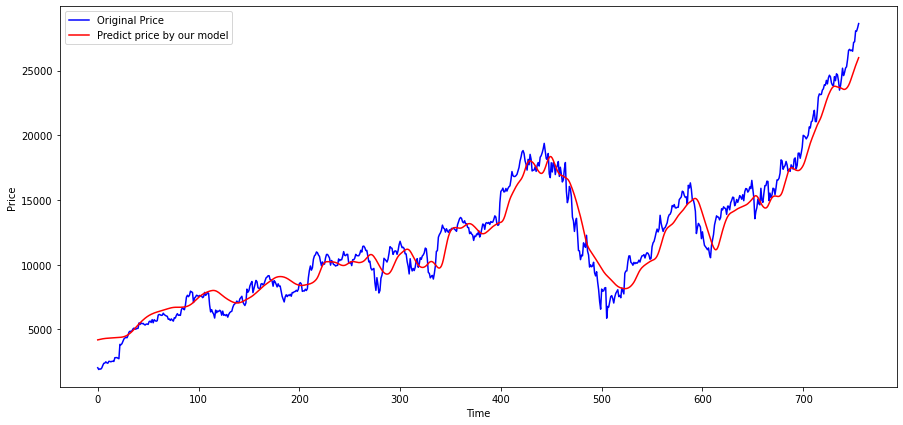

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predict,'r',label='Predict price by our model')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()